# Principles of Data Science

### Lecture 18: Resampling 

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Resampling 

- Today's lecture covers some useful resampling techniques for estimation
    - The bootstrap
    - The jackknife

- Learning objectives:
    - Understand how resampling methods work
    - Be able to deploy them as estimation techniques

## Recap

- We have now seen **several** estimation methods
    - Maximum Likelihood
    - Least Squares
    - Method of Moments
    - Feldman Cousins (intervals and limits)
    - The CLs method (limits)
    
- The <font color="blue">bootstrap</font> and <font color="blue">jackknife</font> are <font color="red">fantastic</font> alternatives
    - Although can be computationally expensive


## When to use resampling methods

- Probably all the time
- They take some compute time (which is the limitation)
- But they are excellent estimation methods
    - but often needed in conjunction with one of the "standard" estimation methods we have already seen
- Also excellent tools for cross-checking procedure
- Some fields refer to parametric bootstrapping as "*throwing toys*" or "*generating pseudo-experiments*"
- We have seen this in use when generating test-statistic distributions

## What is resampling for?
- The data sample we have, $X_i = \{X_1,X_2,\dots,X_N\}$
- Is really sampled from the population
- Often want to know what the distribution of possible samples *we could have got* would be
- This is what a resampling can provide
- There are a few alternatives we will discuss:
    - jackknife
    - (non-parametric) bootstrap
    - parametric bootstrap

## Jackknife resampling

- <font color="green">*See handwritten notes*</font>
- Have an $N-1$ type sampling
- If our original sample is $X_i = \{X_1, X_2, \dots, X_N\}$

- Produce $N$ jackknife samples omitting one point at a time
$$ X_{(1)} = \{X_2, X_3, X_4, \dots, X_N\} \\
   X_{(2)} = \{X_1, X_3, X_4, \dots, X_N\} \\
   \vdots \\
   X_{(N)} = \{X_1, X_2, X_3, \dots, X_{N-1} \}
$$

- Can now reproduce estimate for each jackknife sample

## Jackknife estimates

<font color="green">*See hand written notes*</font>




- For original sample, $X$, and jacknife samples, $X_{(i)}$
- If estimate obtained with $\hat{\theta}= f(X)$
- Jackknife samples estimates are 
$$\hat{\theta}_{(i)} = f(X_1, \dots, X_{i-1}, X_{i+1}, \dots, X_N)$$
- The average of these is 
$$\hat{\theta}_{\text{(.)}} = \frac{1}{N} \sum_{i=1}^{N} \hat{\theta}_{(i)}$$

- From which we can obtain an estimate of the bias:

$$ \hat{b}(\theta) = (n-1)( \hat{\theta}_{\text{(.)}} - \hat{\theta} ) $$

- An consequently a **bias-corrected** estimate

$$ \hat{\theta}_{c} = \hat{\theta} - \hat{b}(\theta) = n\hat{\theta} - (n-1) \hat{\theta}_{(.)} $$

- Sometimes one sees a definition of "*pseudo-values*"

$$ \tilde{\theta}_{(i)} = n\hat{\theta} - (n-1) \hat{\theta}_{(i)} $$

- In which case the unbiased (**bias-corrected**) estimate is simply the average of these

$$ \hat{\theta}_{c} = \frac{1}{N} \sum_{i=1}^N \tilde{\theta}_{(i)} $$


## Jackknife variance

<font color="green">*See hand written notes for proofs*</font>





- These *pseudo-values* can be treated as approximately i.i.d and thus we use their variance to obtain the variance on the jackknife estimate

$$ V(\hat{\theta}_c) = \frac{\hat{s}^2}{N} = \frac{1}{N}\frac{1}{N-1} \sum_{i=1}^N (\tilde{\theta}_{(i)} - \hat{\theta}_c )^2$$

- We can compute the variance on the jackknife estimate, $\hat{\theta}_{(.)}$

$$ V(\hat{\theta}_{(.)}) = \frac{N-1}{N} \sum_{i=1}^N ( \hat{\theta}_{(i)} - \hat{\theta}_{(.)} )^2$$

- The $(N-1)/N$ term corrects for the sample size of $N-1$

# <font color="darkred">*Musical interlude...*</font>

## Delete-m Jackknife

- An extension / simplification of the jackknife for **very large** samples
- For a sample of size $N$ will have $N$ jackknife samples
- The "*delete-m*" technique does not remove one event at a time but $m$ events at a time
- Have $J$ groups containing $m=N/J$ events
- Have estimates $\hat{\theta}_{(j)}$ based on all events excluding those in the group $j$
- The <font color="red">*pseudo-values*</font> become

$$ \tilde{\theta}_{(j)} = J \hat{\theta} - (J-1) \hat{\theta}_{(j)} $$

- The <font color="blue">**bias-corrected**</font> estimate becomes

$$ \hat{\theta}_c = \frac{1}{J} \sum_{j=1}^J \tilde{\theta}_{(j)} $$

- With <font color="blue">**variance**</font>

$$ V(\hat{\theta}_{c}) = \frac{1}{J}\frac{1}{J-1} \sum_{j=1}^{J} ( \tilde{\theta}_{(j)} - \hat{\theta}_c )^2 $$


## Bootstrap resampling

- Jackknife is deterministic but 
    - computationally expensive for large samples
    - inaccurate for small samples
    - provides point-estimate and variance
    
- An alternative is the (non-parametric) bootstrap

- <font color="blue">**Sample with replacement**</font> as many times as needed (<font color="green">*hand-written notes to explain if needed*</font>)
    - get a sample of the same size as the original (with some repetition)
    - non-deterministic (relies on random sampling) so will give slightly different outcomes each time
    - will produce the entire distribution of the estimate (from which variance can be calculated)

## Bootstrapped intervals

- Can produce confidence intervals from the quantiles of the bootstrapped distribution
- Large samples needed for reasonable accuracy at high / low CL 
- Typically accurate to 1/N
- In this case find the emprical CDF, $\tilde{F}$, with inverse, $\tilde{\Phi}= \tilde{F}^{\,-1}$, from the bootstrapped sample and find the percentiles

$$ [\theta_l, \theta_h] = [\tilde{\Phi}(\alpha/2), \tilde{\Phi}(1-\alpha/2)] = [\tilde{\Phi}(z_\alpha), \tilde{\Phi}(z_{1-\alpha})]$$

- This works perfectly fine if there is no bias in the bootstrap sample and the distribution is symmetric

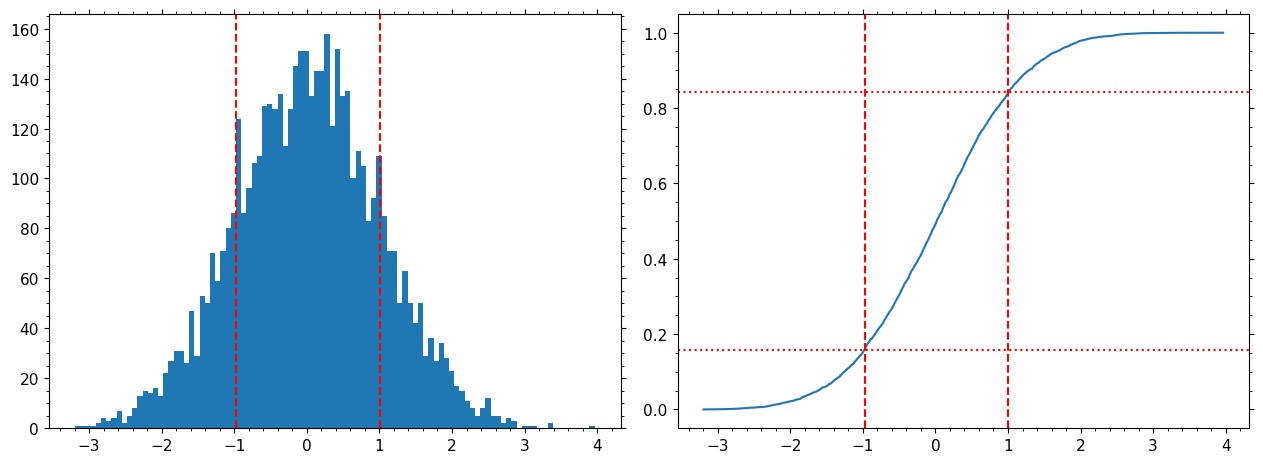

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')
from scipy.stats import chi2
theta_b = np.random.normal(size=5000)

# percentile to compute
alpha = 1-chi2.cdf(1,1)

# compute percentiles
theta_l, theta_h = np.percentile(theta_b, [100*alpha/2, 100*(1-alpha/2)] )

fig, ax = plt.subplots(1,2, figsize=(12.8, 4.8))
ax[0].hist( theta_b, bins=100 )
ax[0].axvline( theta_l, c='r', ls='--' )
ax[0].axvline( theta_h, c='r', ls='--' )

ax[1].plot( np.sort(theta_b), np.linspace(0, 1, len(theta_b), endpoint=False))
ax[1].axvline( theta_l, c='r', ls='--' )
ax[1].axvline( theta_h, c='r', ls='--' )
ax[1].axhline( alpha/2, c='r', ls=':' )
ax[1].axhline( 1-alpha/2, c='r', ls=':' )


## Bias-corrected-accelerated (BCa) intervals

- An extension for confidence interval computation which corrects for bias and skewness in the bootstrap  distribution
- Need to estimate two parameters, $z_0$ and $a$ for bias and skewness correction
- Our standard interval makes the assumption that
$$ \frac{\hat{\theta} - \theta}{\hat{\sigma}} = \mathcal{N}(0,1) $$


<font color="blue">**The bias correction**</font> (called the "BC interval"):

$$ [\theta_l, \theta_h] = [ \tilde{\Phi}( \hat{z}_0 + z_\alpha), \tilde{\Phi}( \hat{z}_0 + z_{1-\alpha} ) ] $$

where $\hat{z}_0$ is a <font color="red">*bias parameter*</font> that is estimated from the bootsrapped sample

- this now corrects the interval such that

$$ \frac{\hat{\theta} - \theta}{\hat{\sigma}} = \mathcal{N}(-z_0, 1) $$

<font color="blue">**The additional acceleration**</font> (called the "BCa interval"):

$$ [\theta_l, \theta_h] = \left[ \tilde{\Phi}\left( \hat{z}_0 + \frac{ \hat{z}_0 + z_\alpha}{1- \hat{a}(\hat{z}_0 + z_\alpha)} \right), \tilde{\Phi}\left( \hat{z}_0 + \frac{ \hat{z}_0 + z_{1-\alpha}}{1- \hat{a}(\hat{z}_0 + z_{1-\alpha})} \right)\right] $$

where $\hat{a}$ is an <font color="red">*acceleration parameter*</font> that is estimated using a jackknife of the sample

- this now corrects the interval such that

$$ \frac{\hat{\theta} - \theta}{\hat{\sigma}} = \mathcal{N}\left(-z_0(1+a\theta), (1+a\theta)^2 \right) $$ 

# End of Lecture 18

By the end of this lecture you should:
   - Understand how the <font color="blue">jackknife</font> and <font color="blue">bootstrap</font> resampling methods work
   - Be able to deploy them as estimation techniques (we will see some examples in the next lecture)